# **import dataset**

In [ ]:
# import all the libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data_load = pd.read_csv('https://docs.google.com/spreadsheets/d/14r-JgKAmWnSW3Z4g9vyvGYi3Ra-tOAgw/export?format=csv')
data_load

,Hours (x),Scores (y)
0,"2,5",21
1,"5,1",47
2,"3,2",27
3,"8,5",75
4,"3,5",30
5,"1,5",20
6,"9,2",88
7,"5,5",60
8,"8,3",81
9,"2,7",25


In [ ]:
data_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hours (x)   25 non-null     object
 1   Scores (y)  25 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 528.0+ bytes


In [ ]:
data_load.shape

(25, 2)

# **Prepering Data**

In [ ]:
data_load = data_load.rename(columns={'Scores (y)': 'Scores_(y)', 'Hours (x)': 'Hours_(x)'})

In [ ]:
data_load['Scores_(y)'] = data_load['Scores_(y)'].astype(float)

In [ ]:
data_load['Hours_(x)'] = data_load['Hours_(x)'].str.replace(',', '.').astype(float)

In [ ]:
data_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hours_(x)   25 non-null     float64
 1   Scores_(y)  25 non-null     float64
dtypes: float64(2)
memory usage: 528.0 bytes


In [ ]:
data_load.isna().sum()

,0
Hours_(x),0
Scores_(y),0


# **Exploratory Data Analysis**

In [ ]:
data_load.describe()

,Hours_(x),Scores_(y)
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
duplicate_rows_before = data_load[data_load.duplicated()]
duplicate_rows_before

,Hours_(x),Scores_(y)


In [ ]:
nq1 = data_load['Hours_(x)'].unique()
nq1

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 1.9, 6.1, 7.4, 4.8, 3.8, 6.9, 7.8])

In [ ]:
nq2 = data_load['Scores_(y)'].unique()
nq2

array([21., 47., 27., 75., 30., 20., 88., 60., 81., 25., 85., 62., 41.,
       42., 17., 95., 24., 67., 69., 54., 35., 76., 86.])

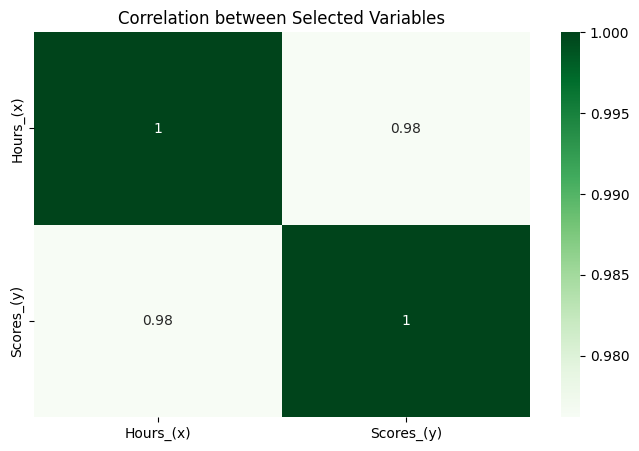

In [ ]:
plt.figure(figsize=[8,5])
sns.heatmap(data_load.corr(), annot = True, cmap = 'Greens')
plt.title("Correlation between Selected Variables")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 800x500 with 0 Axes>

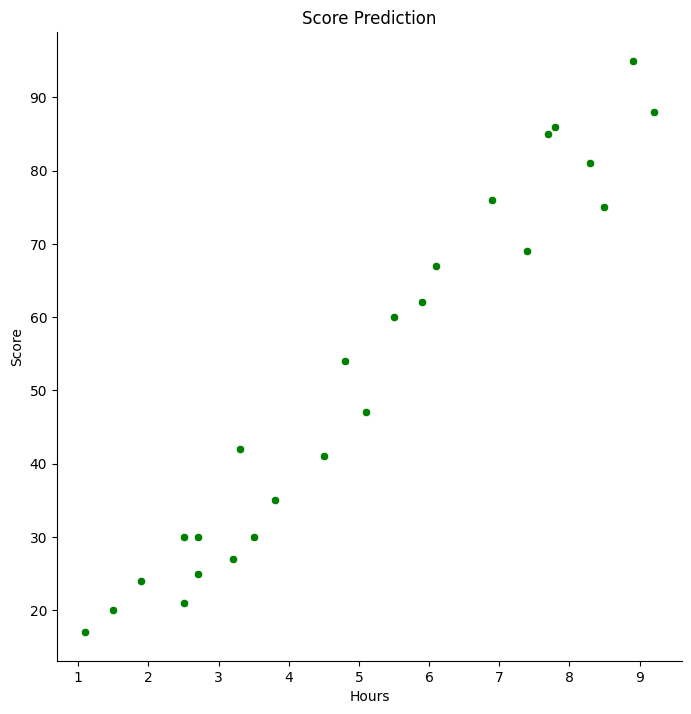

In [ ]:
# These Plots help to explain the values and how they are scattered
plt.figure(figsize=(8,5))
sns.pairplot(data=data_load, x_vars='Hours_(x)', y_vars='Scores_(y)', size=7, kind='scatter', plot_kws={'color': 'green'})
plt.xlabel('Hours')
plt.ylabel('Score')
plt.title('Score Prediction')
plt.show()

In [ ]:
print("Hours min:", data_load['Hours_(x)'].min(), "max:", data_load['Hours_(x)'].max())
print("Scores min:", data_load['Scores_(y)'].min(), "max:", data_load['Scores_(y)'].max())

Hours min: 1.1 max: 9.2
Scores min: 17.0 max: 95.0


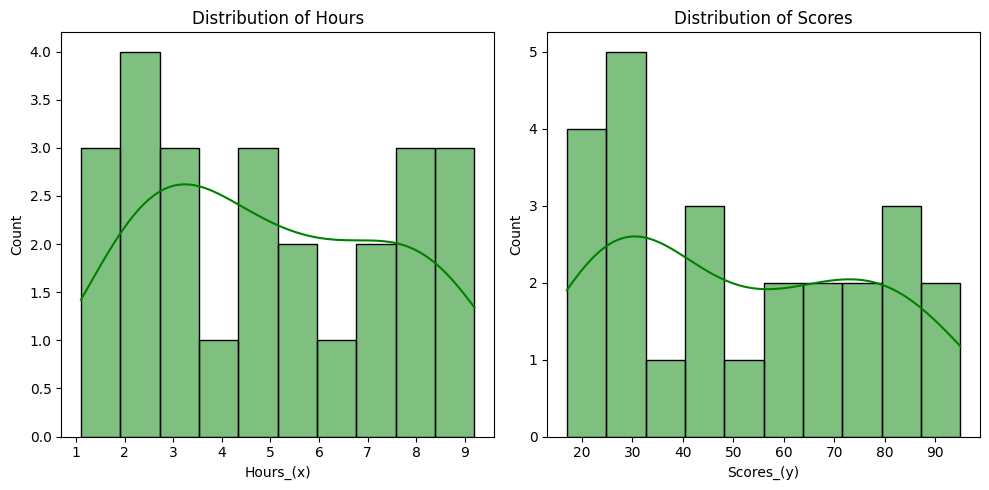

In [ ]:
plt.figure(figsize=(10, 5))
# Plot distribusi Hours
plt.subplot(1, 2, 1)
sns.histplot(data_load['Hours_(x)'], kde=True, bins=10, color='green')
plt.title('Distribution of Hours')

# Plot distribusi Scores
plt.subplot(1, 2, 2)
sns.histplot(data_load['Scores_(y)'], kde=True, bins=10, color='green')
plt.title('Distribution of Scores')
plt.tight_layout()
plt.show()

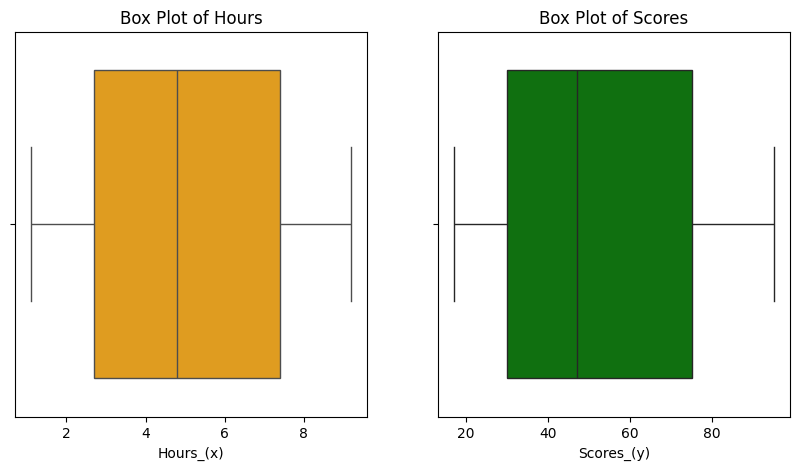

In [ ]:
# Box plot untuk mendeteksi outlier
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=data_load['Hours_(x)'],color='orange')
plt.title('Box Plot of Hours')
plt.subplot(1, 2, 2)
sns.boxplot(x=data_load['Scores_(y)'],color='green')
plt.title('Box Plot of Scores')
plt.show()

# **Splitting data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Experience of Hours data
X = data_load['Hours_(x)']
X.head()

,Hours_(x)
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [ ]:
# Scorey data
y = data_load['Scores_(y)']
y.head()

,Scores_(y)
0,21.0
1,47.0
2,27.0
3,75.0
4,30.0


In [ ]:
# Split the data for train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=42)

In [ ]:
# Convert X_train and X_test to NumPy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Add new axis to the end
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [ ]:
#array
X_train

array([[5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [ ]:
#array
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

In [ ]:
y_train

,Scores_(y)
1,47.0
22,35.0
5,20.0
2,27.0
12,41.0
15,95.0
3,75.0
4,30.0
20,30.0
17,24.0


# **Pemodelan Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Fitting the model using Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr_predict = lr_model.predict(X_test)
lr_predict

array([83.10733229, 26.76559757, 26.76559757, 69.50760322, 59.79351103,
       28.70841601, 34.53687133])

# **Pemodelan DecisionTreeRegressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
dt_predict = dt_model.predict(X_test)
dt_predict

array([75., 30., 30., 69., 67., 30., 27.])

# **Pemodelan Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Fitting the model using RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
rf_predict = rf_model.predict(X_test)
rf_predict

array([79.66, 28.21, 28.21, 72.15, 62.74, 29.21, 28.4 ])

# **Pemodelan Support Vector Regression (SVR)**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[-0.03057614],
       [-0.5416345 ],
       [-1.44581467],
       [-0.77750759],
       [-0.26644923],
       [ 1.46328675],
       [ 1.30603803],
       [-0.65957104],
       [-0.9740685 ],
       [-1.28856595],
       [-0.14851269],
       [ 0.36254567],
       [ 1.03085276],
       [ 0.12667258],
       [ 0.99154058],
       [-1.6030634 ],
       [ 0.87360403],
       [ 1.5812233 ]])

In [ ]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 1.22741366],
       [-1.05269286],
       [-1.05269286],
       [ 0.67704312],
       [ 0.28392131],
       [-0.9740685 ],
       [-0.73819541]])

In [ ]:
# Fitting the model using Support Vector Regression (SVR)
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)

SVR()

In [ ]:
svr_predict = svr_model.predict(X_test_scaled)
svr_predict

array([57.64704686, 45.43150136, 45.43150136, 56.44677049, 53.74338372,
       45.48568911, 46.07526301])

# **K-Nearest Neighbors (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, 1))
X_test_scaled = scaler.transform(X_test.reshape(-1, 1))

In [ ]:
# Tuning hyperparameter n_neighbors
param_grid = {'n_neighbors': range(1, 31)}
grid = GridSearchCV(KNeighborsRegressor(), param_grid, refit=True, verbose=3, scoring='neg_mean_squared_error')
grid.fit(X_train_scaled, y_train)
# Nilai n_neighbors terbaik
best_n_neighbors = grid.best_params_['n_neighbors']
best_n_neighbors

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ...................n_neighbors=1;, score=-23.000 total time=   0.0s
[CV 2/5] END ...................n_neighbors=1;, score=-99.000 total time=   0.0s
[CV 3/5] END ...................n_neighbors=1;, score=-30.750 total time=   0.0s
[CV 4/5] END ..................n_neighbors=1;, score=-238.000 total time=   0.0s
[CV 5/5] END ..................n_neighbors=1;, score=-104.667 total time=   0.0s
[CV 1/5] END ...................n_neighbors=2;, score=-27.375 total time=   0.0s
[CV 2/5] END ...................n_neighbors=2;, score=-74.812 total time=   0.0s
[CV 3/5] END ...................n_neighbors=2;, score=-78.688 total time=   0.0s
[CV 4/5] END ..................n_neighbors=2;, score=-124.667 total time=   0.0s
[CV 5/5] END ..................n_neighbors=2;, score=-102.083 total time=   0.0s
[CV 1/5] END ...................n_neighbors=3;, score=-31.028 total time=   0.0s
[CV 2/5] END ...................n_neighbors=3;,

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 239, in _get_response_values
    y_pred, pos_label = predic

3

[CV 2/5] END ......................n_neighbors=23;, score=nan total time=   0.0s
[CV 3/5] END ......................n_neighbors=23;, score=nan total time=   0.0s
[CV 4/5] END ......................n_neighbors=23;, score=nan total time=   0.0s
[CV 5/5] END ......................n_neighbors=23;, score=nan total time=   0.0s
[CV 1/5] END ......................n_neighbors=24;, score=nan total time=   0.0s
[CV 2/5] END ......................n_neighbors=24;, score=nan total time=   0.0s
[CV 3/5] END ......................n_neighbors=24;, score=nan total time=   0.0s
[CV 4/5] END ......................n_neighbors=24;, score=nan total time=   0.0s
[CV 5/5] END ......................n_neighbors=24;, score=nan total time=   0.0s
[CV 1/5] END ......................n_neighbors=25;, score=nan total time=   0.0s
[CV 2/5] END ......................n_neighbors=25;, score=nan total time=   0.0s
[CV 3/5] END ......................n_neighbors=25;, score=nan total time=   0.0s
[CV 4/5] END ...............

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 239, in _get_response_values
    y_pred, pos_label = predic

In [ ]:
# Definisikan model KNN
knn_model = KNeighborsRegressor(n_neighbors=3)

# Fit model pada data pelatihan
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
knn_predict = knn_model.predict(X_test_scaled)
knn_predict

array([85.33333333, 27.        , 27.        , 73.66666667, 58.        ,
       29.        , 30.66666667])

# **Hasil Evaluasi**

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

In [ ]:
# Daftar nama model
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'KNN']

# Hitung metrik evaluasi untuk setiap model
r2_scores = [
    r2_score(y_test, lr_predict),
    r2_score(y_test, dt_predict),
    r2_score(y_test, rf_predict),
    r2_score(y_test, svr_predict),
    r2_score(y_test, knn_predict)
]
mse_scores = [
    mean_squared_error(y_test, lr_predict),
    mean_squared_error(y_test, dt_predict),
    mean_squared_error(y_test, rf_predict),
    mean_squared_error(y_test, svr_predict),
    mean_squared_error(y_test, knn_predict)
]
rmse_scores = [
    math.sqrt(mean_squared_error(y_test, lr_predict)),
    math.sqrt(mean_squared_error(y_test, dt_predict)),
    math.sqrt(mean_squared_error(y_test, rf_predict)),
    math.sqrt(mean_squared_error(y_test, svr_predict)),
    math.sqrt(mean_squared_error(y_test, knn_predict))
]
mae_scores = [
    mean_absolute_error(y_test, lr_predict),
    mean_absolute_error(y_test, dt_predict),
    mean_absolute_error(y_test, rf_predict),
    mean_absolute_error(y_test, svr_predict),
    mean_absolute_error(y_test, knn_predict)
]

# Buat DataFrame untuk menampilkan hasil evaluasi
evaluation_data = pd.DataFrame({
    'Algoritma Section': model_names,
    'R²': r2_scores,
    'MSE': mse_scores,
    'RMSE': rmse_scores,
    'MAE': mae_scores
})

# Tampilkan DataFrame
evaluation_data

,Algoritma Section,R²,MSE,RMSE,MAE
0,Linear Regression,0.955351,23.516396,4.849371,4.425395
1,Decision Tree,0.880386,63.000000,7.937254,6.714286
2,Random Forest,0.925400,39.291143,6.268265,4.677143
3,SVR,0.385069,323.880234,17.996673,16.512393
4,KNN,0.937707,32.809524,5.727960,5.000000


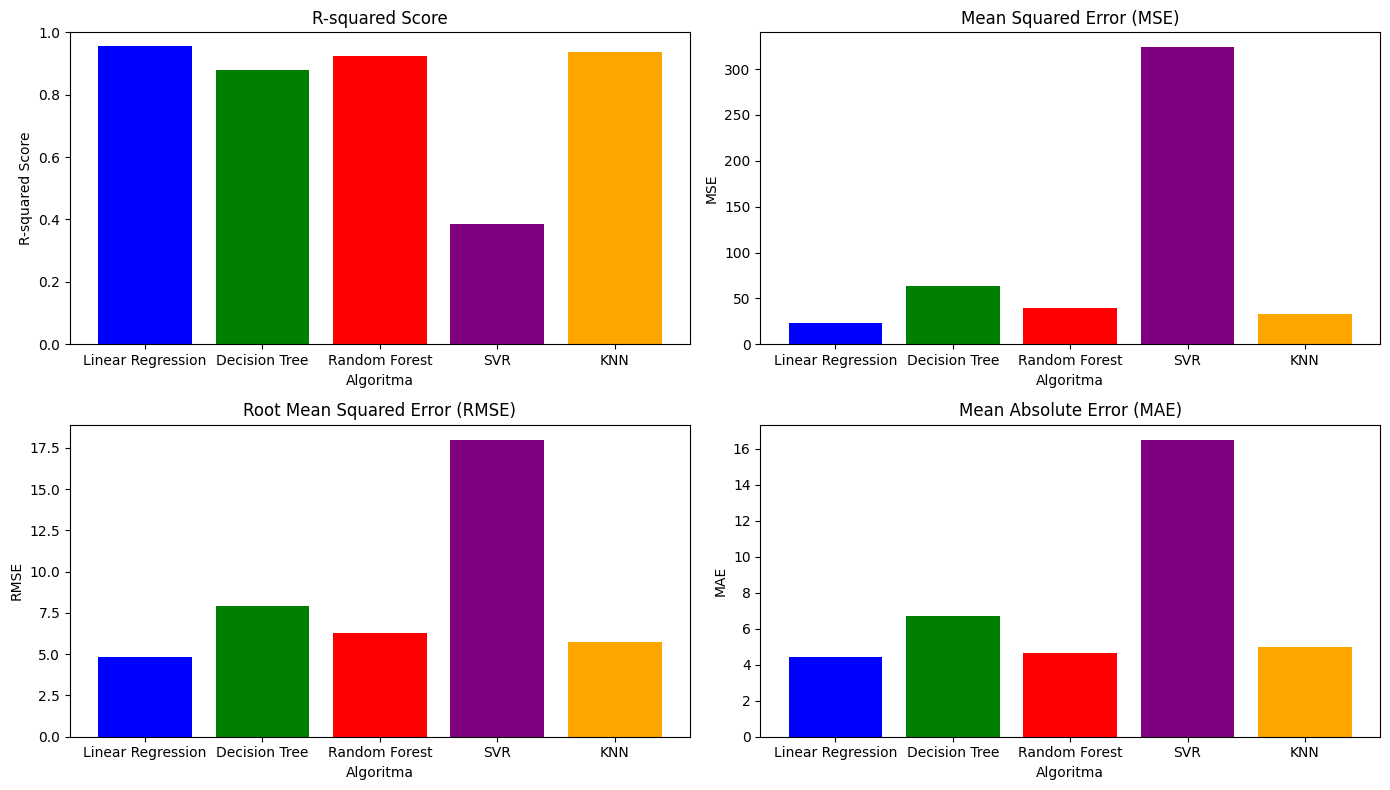

In [ ]:
# Data untuk visualisasi
algoritma = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'KNN']
r2_scores = evaluation_data['R²'].values
mse_scores = evaluation_data['MSE'].values
rmse_scores = evaluation_data['RMSE'].values
mae_scores = evaluation_data['MAE'].values

# Membuat figure dan axes untuk subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

# Bar chart untuk R-squared
axs[0, 0].bar(algoritma, r2_scores, color=['blue', 'green', 'red', 'purple', 'orange'])
axs[0, 0].set_title('R-squared Score')
axs[0, 0].set_xlabel('Algoritma')
axs[0, 0].set_ylabel('R-squared Score')
axs[0, 0].set_ylim(0, 1)  # Set y-axis limits to 0-1 for R-squared

# Bar chart untuk MSE
axs[0, 1].bar(algoritma, mse_scores, color=['blue', 'green', 'red', 'purple', 'orange'])
axs[0, 1].set_title('Mean Squared Error (MSE)')
axs[0, 1].set_xlabel('Algoritma')
axs[0, 1].set_ylabel('MSE')

# Bar chart untuk RMSE
axs[1, 0].bar(algoritma, rmse_scores, color=['blue', 'green', 'red', 'purple', 'orange'])
axs[1, 0].set_title('Root Mean Squared Error (RMSE)')
axs[1, 0].set_xlabel('Algoritma')
axs[1, 0].set_ylabel('RMSE')

# Bar chart untuk MAE
axs[1, 1].bar(algoritma, mae_scores, color=['blue', 'green', 'red', 'purple', 'orange'])
axs[1, 1].set_title('Mean Absolute Error (MAE)')
axs[1, 1].set_xlabel('Algoritma')
axs[1, 1].set_ylabel('MAE')

# Menyesuaikan tata letak agar subplot tidak saling tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()

# **Linear Regression**

Merupakan model terbaik untuk memprediksi skor berdasarkan jam belajar. Hal ini ditunjukkan dengan nilai R-squared tertinggi dan nilai error (MSE, RMSE, MAE) yang paling rendah dibandingkan dengan algoritma lainnya seperti Decision Tree, Random Forest, SVR, dan KNN

In [ ]:
# Buat data baru
new_data = pd.DataFrame({'Hours_(x)': [3.0, 5.0, 10.0]})

# Ubah data baru ke dalam format NumPy array
new_data_array = new_data.to_numpy()

# Gunakan model Linear Regression untuk melakukan prediksi
predictions = lr_model.predict(new_data_array)

# Buat DataFrame untuk menampilkan data baru dan prediksinya
prediction_lr = pd.DataFrame({'Hours_(x)': new_data['Hours_(x)'], 'Predicted_Scores_(y)': predictions})
prediction_lr

,Hours_(x),Predicted_Scores_(y)
0,3.0,31.622644
1,5.0,51.050828
2,10.0,99.621289
